In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
az.style.use('arviz-white')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [uk]


Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 31 seconds.
c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A109E52AF0>],
      dtype=object)

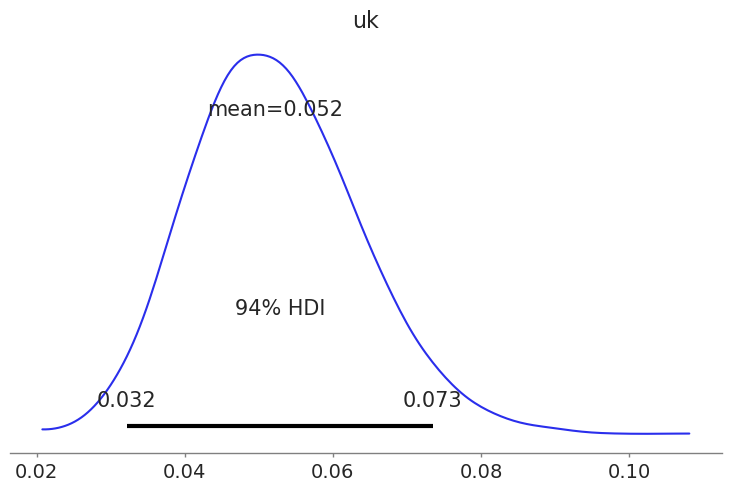

In [22]:
#  Find proportion of google earth entries in UK. Ans: 0.01%
observations = [0]*380+ [1]*20
uk_obs = sum(observations)
total_obs = len(observations)
#  Model
with pm.Model() as the_model:
    #  Prior.
	p_uk = pm.Uniform("uk",0,1)
    #  Likelihood.
	uk = pm.Binomial("likelihood", p=p_uk,n=total_obs, observed=uk_obs)
    #  Marcov Chain Monte Carlo. 
    #  Numbers of draws and chains. The more chains included, the more closely the distribution of sample matches actual distribution.
	trace_obs = pm.sample(10000,chains=2)
#  Posterior.
az.plot_posterior(trace_obs)
#  Posterior output:
#  mean: 5.2%.
#  94% HDI: 3.3%-7.4%.

In [23]:
inference_data = az.from_pymc3(trace_obs)

c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [24]:
az.summary(inference_data)

#  Create a data frame with summary statistics.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
uk,0.052,0.011,0.032,0.073,0.0,0.0,8546.0,8546.0,8424.0,12183.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A109F5DFA0>,
      dtype=object)

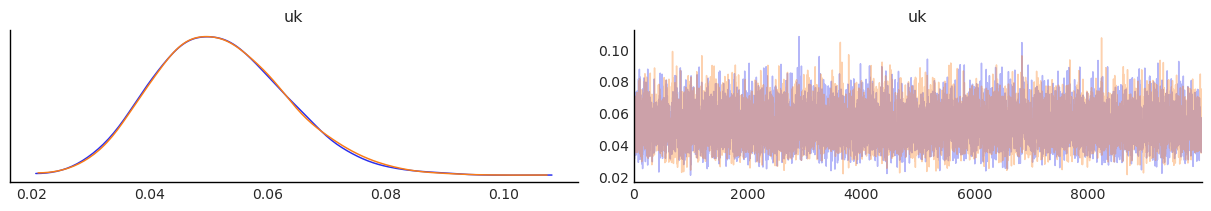

In [25]:
az.plot_trace(inference_data)

#  Produces a trace plot (time on x axis, the values taken by one of the coordinates of the draws on the y axis)
#  This one shows the MCMC sampling across the available sample space many times and settles quickly with no real issues. 
#  Can be used to check how the sampling procedure occured.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1045C9130>,
      dtype=object)

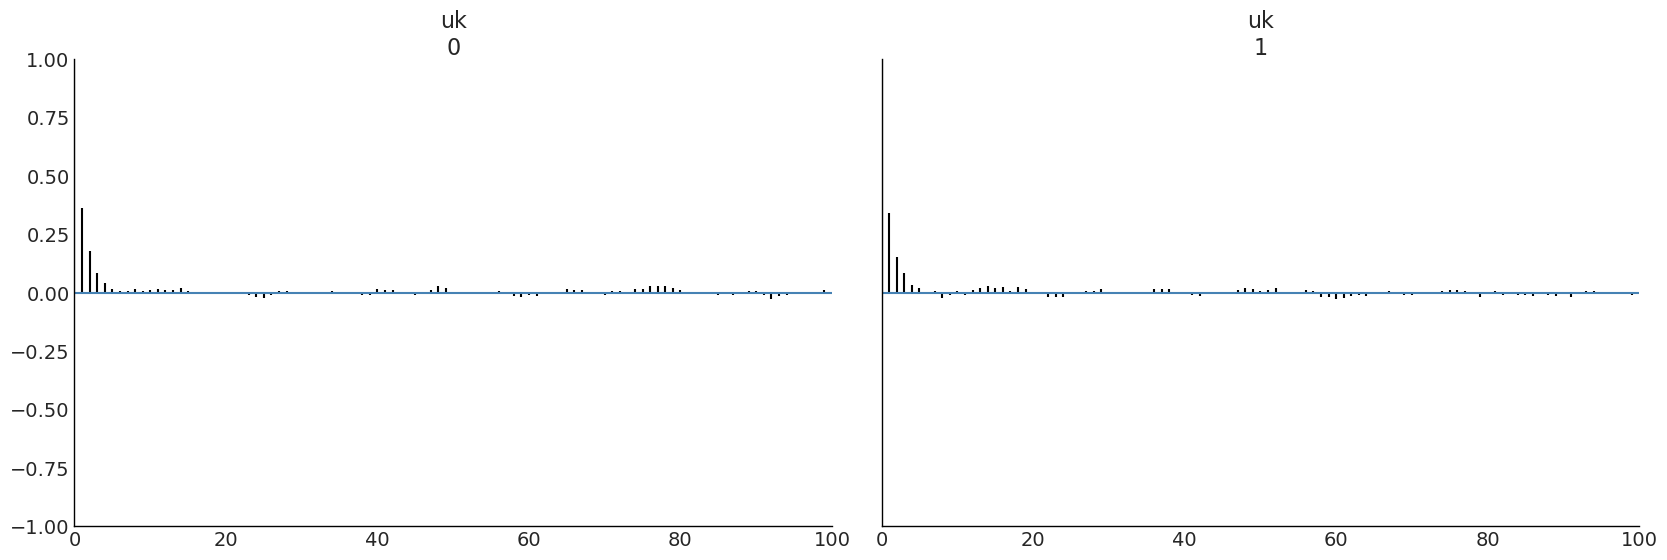

In [26]:
az.plot_autocorr(inference_data)

#  Bar plot of the autocorrelation function for a sequence of data.
#  Useful in particular for posteriors from MCMC samples which may display correlation.

c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A10982A310>],
      dtype=object)

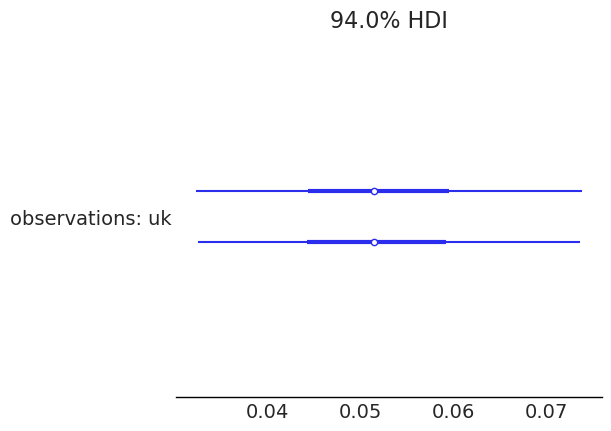

In [27]:
az.plot_forest([trace_obs], model_names=["observations"])

#  Forest plot to compare HDI intervals from a number of distributions.

#  More useful if plotting multiple results for comparison. 